(Defining activity coefficients)=
# Defining activity coefficients
[<!-- module-ltg badge --><span class="module module-ltg">Low-Temperature Geochemistry</span>](module-ltg) 
```{index} CO2-H2O System
```

Activities ($a$) can be thought at as the “effective concentration” or the “availability of component for reactions”. In aqueous solutions, activity often related to something measurable, i.e. “the concentration”:

$$a_i = \gamma_i \cdot \frac{m_i}{m_0}$$

where

   * $\gamma_i$ is the “rational activity coefficient”.
   * $m_i$ is the molality (mole solute/kg solvent).
   * $m_0$ is the reference state ($m_0 = 1\,molal$).

In this session, we will focus on defining activity coefficients ($\gamma_i$).

We can get $y_i$ by:

1) Some helpful rules

   * $a_{l,s}=1$ for pure liquids or solids.
   * $\gamma_i = 1$  in ideal (or very dilute) solutions.
   
2) Models exist that predict the values of activity coefficients given a set of empirical, substance-specific, constants and a parameter, **ionic strength ($I$)**, that models the effect of other ions and the solvent. Ionic strength accounts for Coulombic interactions and other effects between ions.

$$I = \frac{1}{2} \sum_i m_j z_j^2$$

where $m_j$ = concentration (molarity, molality), and $z_j$ = ionic charge.

   * Since it is **“(charge)$^2$”**, it emphasizes the effect of higher charges from multivalent ions and excludes neutral molecules (charge=0)!
   * $H^+$ and $OH^-$ are generally ignored – their concentrations is typically ~$10^{-7}$ unless working in very acidic or basic conditions, or very dilute situations with trace elements.
   
In theory, to calculate $I$, one should need a full determination of the concentrations of all ions in solutions. However, **in practice, about 99% of dissolved materials in streams, lakes, aquifers and oceans are accounted by 10 elements!**

![](images/DAC1.png)

$\quad$Figure 1: "Analysis and Calculated ionic strengths of some natural waters" (Misra, 2012).

There are several models available for calculating activity coefficients.

1) Debye-Huckel (limiting) model (useful when $I \leq 0.01\,m$):

$$\log \gamma_i = -A z_i^2 \sqrt{I}$$

2) Debye-Huckel (extended) model (useful when $I \leq 0.1\,m$):

$$\log \gamma_i = \frac{-A z_i^2 \sqrt{I}}{1+å_i B \sqrt{I}}$$

Some assumptions underlying the Debye-Huckel (extended) model:

    (i) Electrolytes are completely dissociated into ions.
    (ii) Positive ions are surrounded by a cloud of negative charge and vice versa.
    (iii) Size of the ions do not vary with ionic strength.
    (iv) Interactions among aqueous species are fully electrostatic, excludes repulsion for ion of the same charge.

3) Davies model (useful when $I \leq 0.6\,m$):

$$\log \gamma_i = -A z_i^2 \left[ \frac{\sqrt{I}}{1+\sqrt{I}} -0.3I \right]$$

4) Truesdell-Jones model (useful when $I \leq 2.0\,m$):

$$\log \gamma_i = \frac{-A z_i^2 \sqrt{I}}{1+å_i B \sqrt{I}} + bI$$

where

   * $I$ is the ionic strength.
   * $A, B$ are constants.
   * $å_i$ is the hydrated, or effective ionic radius of the $i^{th}$ ion.
   * $z_i$ is the ionic charge of the $i^{th}$ ion.
   
There are a few differences between Truesdell-Jones and Davies models important to note.

Truesdell-Jones is basically the same as Debye-Huckel, but

   * with a $+bI$ term at the end,
   * to account for the increase in activity observed from measurements at high ionic strength, due to the lowering of the dielectric constant and therefore increased tendency for ion pairing.
   * other assumptions are similar to Debye-Hueckel.

Whereas the Davies equation has no $å_i$,

   * which is convenient as there are few data for this parameter,
   * but that also means the Davies equation is less accurate. It is OK only to $I<0.6\,m$.
   
The figure below illustrates the environmental differences in ionic strength.

![](images/DAC2.png)

$\quad$Figure 2: The environmental differences in ionic strength (White, 2013).

Following the table of constants we need for the practical, the dependence of activity coefficients on ionic strengths of some ions will be plotted.

In [2]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [3]:
# create our own functions

# simple molar mass calculator (cannot input the formula containing parentheses e.g. Ca(OH)_2)
def molar_mass_calculator(species):
    atomic_mass_dict = {
        # first 20 elements in the periodic table
        'H': 1.008,
        'He': 4.0026,
        'Li': 6.94,
        'Be': 9.0122,
        'B': 10.81,
        'C': 12.011,
        'N': 14.007,
        'O': 15.999,
        'F': 18.998,
        'Ne': 20.180,
        'Na': 22.99,
        'Mg': 24.305,
        'Al': 26.982,
        'Si': 28.085,
        'P': 30.974,
        'S': 32.06,
        'Cl': 35.45,
        'Ar': 39.948,
        'K': 39.0983,
        'Ca': 40.078
    }
    
    MW = 0

    for key, value in atomic_mass_dict.items():
        element_index = species.find(key)
        number_of_atom = ''
                
        if element_index != -1: # if element is in the species
            if len(key) == 2:  # if element symbol has two characters (e.g. Ca)
                if species[element_index + 2] == '_':  # if the element has more than one atom in the formula
                    if species[element_index + 3] == '{':  # if the number of atoms of the element is in {}
                        string_after_element = species[element_index + 4 : len(species)]
                    else:
                        string_after_element = species[element_index + 3 : len(species)]
                        
                    for c in string_after_element:
                        if c.isnumeric():
                            number_of_atom += c
                        else:
                            break
                                        
                else:
                    number_of_atom = '1'
                    
            else:  # len(key) == 1  # if element symbol has one characters (e.g. H)
                species_without_two_char_elements = species
                while species_without_two_char_elements[element_index:element_index+2] in atomic_mass_dict:
                    species_without_two_char_elements = species_without_two_char_elements.replace(species_without_two_char_elements[element_index:element_index+2], "")
                    element_index = species_without_two_char_elements.find(key)
                
                if element_index != -1: # if element is in the species
                    if species_without_two_char_elements[element_index + 1] == '_':  # if the element has more than one atom in the formula
                        if species_without_two_char_elements[element_index + 2] == '{':  # if the number of atoms of the element is in {}
                            string_after_element = species_without_two_char_elements[element_index + 3 : len(species_without_two_char_elements)]
                        else:
                            string_after_element = species_without_two_char_elements[element_index + 2 : len(species_without_two_char_elements)]
                        for c in string_after_element:
                            if c.isnumeric():
                                number_of_atom += c
                            else:
                                break
                    else:
                        number_of_atom = '1'
        
        if number_of_atom.isnumeric():
            number_of_atom = int(number_of_atom)
        else:
            number_of_atom = 0
        
        MW += value * number_of_atom
    
    return MW


# simple function that can extract the charge from a formula (must be ion, not ionic compound)
def ionic_charge(ion):
    wedge_index = ion.find('^')  # the index of ^
    charge = 0
    if wedge_index != -1:
        string_after_wedge = ion[wedge_index + 1 : len(ion)]
        charge_str = ''
        for c in string_after_wedge:
            if c.isnumeric():
                charge_str += c
            elif c in '+-':
                if charge_str == '':
                    charge_str = '1'
                if c == '-':
                    charge_str = c + charge_str
                break
        charge = int(charge_str)

    return charge


def ionic_strength(ions_list, concentrations_list):
    I = 0
    for i in len(ions_list):
        I += concentrations_list[i] * ionic_charge(ions_list[i])**2
    return I


def yi_Debye_Huckel_limiting_model(A, ion, I):
    return 10**(-A*(ionic_charge(ion)**2)*(I**0.5))


def yi_Debye_Huckel_extended_model(A, ion, I, ao, B):
    return 10**(-A*(ionic_charge(ion)**2)*(I**0.5) / (1+ao*B*(I**0.5)))


def yi_Davies_model(A, ion, I):
    return 10**(-A*(ionic_charge(ion)**2)*((I**0.5)/(1+I**0.5) - 0.3*I))
                
                
def yi_Truesdell_Jones_model(A, ion, I, ao, B, b):
    return 10**((-A*(ionic_charge(ion)**2)*(I**0.5) / (1+ao*B*(I**0.5))) + b*I)

In [4]:
# creating a DataFrame for ao and b
ions_data = ['$Al^{3+}$', '$Ca^{2+}$', '$Mg^{2+}$', '$Na^+$', '$K^+$', '$HCO_3^-$', '$SO_4^{2-}$', '$NO_3^-$']
Debye_Huckel_ao_data = [9.0, 6.0, 8.0, 4.0, 3, 4.0, 4.5, 3]  # not yet times by 10^-8
Truesdell_Jones_ao_data = [6.65, 4.86, 5.46, 4.32, 3.71, 5.4, 5.31, None]  # not yet times by 10^-8
Truesdell_Jones_b_data = [0.10, 0.15, 0.22, 0.06, 0.01, 0, -0.07, None] 

dict1 = {'Species' : ions_data,
        'Debye-Huckel $å × 10^{-8}$' : Debye_Huckel_ao_data,
        'Truesdell-Jones $å × 10^{-8}$' : Truesdell_Jones_ao_data,
        'Truesdell-Jones $b$' : Truesdell_Jones_b_data}
df1 = pd.DataFrame(dict1)
df1.loc[:, 'Debye-Huckel $å × 10^{-8}$'] = df1['Debye-Huckel $å × 10^{-8}$'].map('{:.1f}'.format)
df1.loc[:, 'Truesdell-Jones $å × 10^{-8}$'] = df1['Truesdell-Jones $å × 10^{-8}$'].map('{:.2f}'.format)
df1.loc[:, 'Truesdell-Jones $b$'] = df1['Truesdell-Jones $b$'].map('{:.2f}'.format)
print("Table 1: Values of parameters for the Debye-Huckel and Truesdell-Jones equations.")
display(df1.style.hide_index())

# creating a DataFrame for A and B at 1 bar
T_data = list(np.linspace(0, 60, 13))
A_data = [0.4883, 0.4921, 0.4960, 0.5000, 0.5042, 0.5085, 
     0.5130, 0.5175, 0.5221, 0.5271, 0.5319, 0.5371, 0.5425]
B_data = [0.3241, 0.3249, 0.3258, 0.3262, 0.3273, 0.3281,
     0.3290, 0.3297, 0.3305, 0.3314, 0.3321, 0.3329, 0.3338]  # not yet times by 10^8

dict2 = {'Temperature $(^\circ C)$' : T_data,
        '$A$' : A_data,
        '$B$ $×\,10^{8}$' : B_data}
df2 = pd.DataFrame(dict2)
df2.loc[:, 'Temperature $(^\circ C)$'] = df2['Temperature $(^\circ C)$'].map('{:.0f}'.format)
df2.loc[:, '$A$'] = df2['$A$'].map('{:.4f}'.format)
df2.loc[:, '$B$ $×\,10^{8}$'] = df2['$B$ $×\,10^{8}$'].map('{:.4f}'.format)
print("\nTable 2: The values of A and B at different temperatures.")
display(df2.style.hide_index())

Table 1: Values of parameters for the Debye-Huckel and Truesdell-Jones equations.


Species,Debye-Huckel $å × 10^{-8}$,Truesdell-Jones $å × 10^{-8}$,Truesdell-Jones $b$
$Al^{3+}$,9.0,6.65,0.10
$Ca^{2+}$,6.0,4.86,0.15
$Mg^{2+}$,8.0,5.46,0.22
$Na^+$,4.0,4.32,0.06
$K^+$,3.0,3.71,0.01
$HCO_3^-$,4.0,5.40,0.00
$SO_4^{2-}$,4.5,5.31,-0.07
$NO_3^-$,3.0,nan,nan



Table 2: The values of A and B at different temperatures.


Temperature $(^\circ C)$,$A$,"$B$ $×\,10^{8}$"
0,0.4883,0.3241
5,0.4921,0.3249
10,0.4960,0.3258
15,0.5000,0.3262
20,0.5042,0.3273
25,0.5085,0.3281
30,0.5130,0.3290
35,0.5175,0.3297
40,0.5221,0.3305
45,0.5271,0.3314


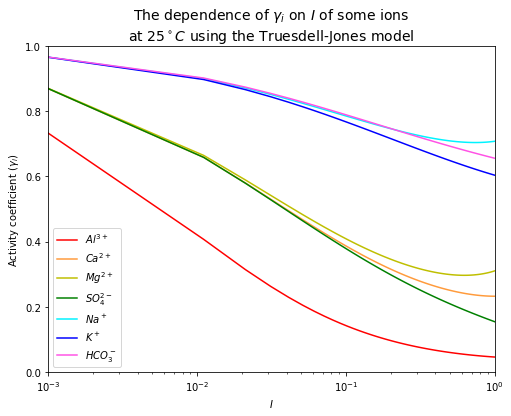

In [5]:
# plot the dependence of yi on I of some ions at 25 C using the Truesdell-Jones model
plt.figure(figsize=(8,6))
I = np.linspace(0.001, 1, 100)
ions = ['$Al^{3+}$', '$Ca^{2+}$', '$Mg^{2+}$', '$SO_4^{2-}$', '$Na^+$', '$K^+$', '$HCO_3^-$']
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b', '#FF52E5']
A = A_data[T_data.index(25)]
B = B_data[T_data.index(25)]

for i in range(len(ions)):  # loop to plot for each ion
    ao = Truesdell_Jones_ao_data[ions_data.index(ions[i])]
    b = Truesdell_Jones_b_data[ions_data.index(ions[i])]
    plt.plot(I, yi_Truesdell_Jones_model(A, ions[i], I, ao, B, b), colors[i], label=ions[i])

plt.xlabel('$I$')
plt.ylabel('Activity coefficient $(\gamma_i)$')
plt.xlim([0.001, 1])
plt.ylim([0, 1])
plt.xscale("log")
plt.title('The dependence of $\gamma_i$ on $I$ of some ions\nat $25^\circ C$ using the Truesdell-Jones model', fontsize=14)
plt.legend(loc='best', fontsize=10)

It can be seen from the plot above that different ions have different activity coefficients, depending on their charges and ionic radii.

To get a sense of the importance of the difference between activity and concentration, you can compare the values you get for $a_i = \gamma_im_i$ VS $m_i$. They can be very different.

## Lesson 3 - Problem 3 (Aqueous solutions: the Thames river estuary)

The following data were collected from samples from the Thames river.

In [6]:
# Data collected from samples from the Thames river
species = ['$SiO_2$', '$Ca^{2+}$', '$Mg^{2+}$', '$Na^+$', '$K^+$', '$HCO_3^-$', '$SO_4^{2-}$', '$NO_3^-$']
concentrations = [15, 49, 14, 5.4, 3.1, 168, 40, 4.3]  # mg/l

dict3 = {'Species' : species,
        'Concentration $(mg/l)$' : concentrations}
df3 = pd.DataFrame(dict3)
df3.loc[:, 'Concentration $(mg/l)$'] = df3['Concentration $(mg/l)$'].map('{:.1f}'.format)
display(df3.style.hide_index())

Species,Concentration $(mg/l)$
$SiO_2$,15.0
$Ca^{2+}$,49.0
$Mg^{2+}$,14.0
$Na^+$,5.4
$K^+$,3.1
$HCO_3^-$,168.0
$SO_4^{2-}$,40.0
$NO_3^-$,4.3


a) Unfortunately, the technician who performed these chemical analyses was lazy and forgot to write the charges for each ion. Which of these species are ionic and what is the charges corresponding to these ions in this river sample? Add the correct charges to the data table above.

See annotations in table above.

b) What is the molal ionic strength of this water sample? (beware of units, convert from $mg/l$ to $mol/kg$)?

Assume the density of water is $1000\,g/l$.

In [14]:
# function for converting the unit of concentration from mg/l to mol/kg (m)
def convert_mg_per_l_to_m(ion, conc, show_calculation=False):
    MW = molar_mass_calculator(ion)
    m = conc*(10**-3)/MW
    if show_calculation:
        return r"$${%.1f\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{%.2f}\left(\frac{mol}{g}\right)\
        \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \
        %.2f \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$" % (conc, MW, m*1000)
    else:
        return m
    
    
# Create a table to show a detailed unit conversion
concentration_conversions = [convert_mg_per_l_to_m(species[i], concentrations[i], True) for i in range(len(species))]

dict4 = {'Species' : species,
        'Concentration (m = mol/kg)' : concentration_conversions}
df4 = pd.DataFrame(dict4)
display(df4.style.hide_index().set_properties(**{'text-align': 'middle'}))



Species,Concentration (m = mol/kg)
$SiO_2$,$${15.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{60.08}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.25 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$Ca^{2+}$,$${49.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{40.08}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 1.22 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$Mg^{2+}$,$${14.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{24.30}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.58 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$Na^+$,$${5.4\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{22.99}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.23 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$K^+$,$${3.1\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{39.10}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.08 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$HCO_3^-$,$${168.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{61.02}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 2.75 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$SO_4^{2-}$,$${40.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{96.06}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.42 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$NO_3^-$,$${4.3\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{62.00}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.07 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$


## References

- Lecture slide and Practical for Lecture 3 of the Low-Temperature Geochemistry module
- Misra, K.C. (2012). Introduction to geochemistry : principles and applications. Wiley-Blackwell.
- White, W. (2013). Geochemistry. Wiley-Blackwell.